In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in hetionet paths from query compound to treatment
f = open('data/HumCircMed2018v2_mapped_hetionet_edges.tsv', 'r')

effect = []
halftime = []
metatype = []
compound = []
treatment = [] 
gene = []

for line in f:
    line = line.strip()
    line_s = line.split('\t')
    if line_s[0] == 'more eff' or line_s[0] == 'none':
        line_ss = []
        for j in range(4,len(line_s)):
            # check whether the path contains a gene
            line_ss.append(line_s[j].split('::')[0])
            if 'Gene' in line_ss:
                gene_id = line_ss.index('Gene')+4
                gene.append(int(line_s[gene_id].split('::')[1]))
                effect.append(line_s[0])
                halftime.append(float(line_s[1]))
                metatype.append(line_s[2])
                compound.append(line_s[3].split('::')[1])
                treatment.append(line_s[-1].split('::')[1])
            else:
                continue
    else:
        continue
f.close()

# define a data frame
hetio_circa = {'effect': effect, 'halftime': halftime, 
               'metatype': metatype, 'compound': compound, 
               'treatment': treatment, 'gene': gene}
hetio_circa = pd.DataFrame(hetio_circa)
hetio_circa = hetio_circa.drop_duplicates()

In [3]:
# read in processed CircaDB data 
circa_db = pd.read_csv('data/circa_db_mapped.tsv', sep = '\t')
col_subset_ids = [0] + list(range(14, 27))
circa_amp = circa_db.iloc[:,col_subset_ids]

In [4]:
# merge hetionet paths with CircaDB by gene id
hetio_circa = pd.merge(hetio_circa, circa_amp, how='inner', left_on='gene', right_on='gene_id', sort=False)

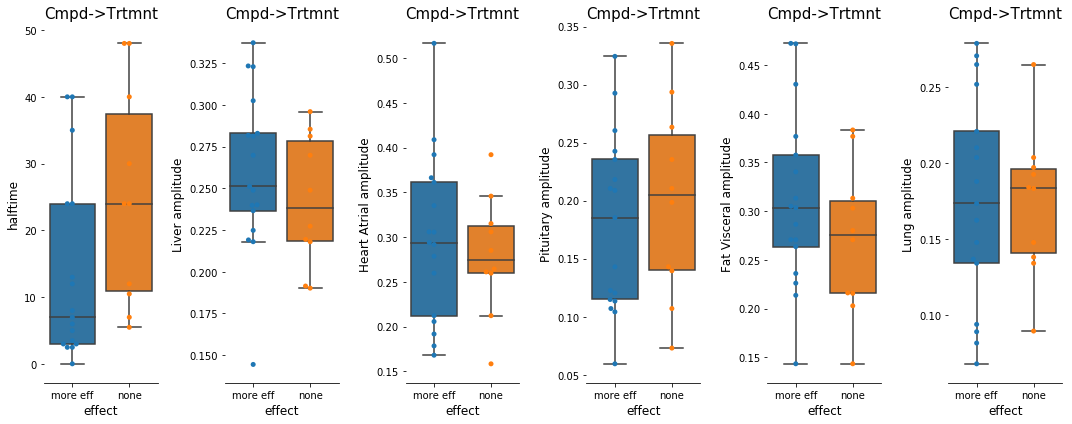

In [5]:
# summary by compound -> treatment
hetio_circa_summary = hetio_circa.groupby(['effect','halftime','metatype','compound','treatment'], 
                                          as_index=False).mean().groupby(['effect','halftime',
                                                                          'compound','treatment'],as_index=False).mean()
#  
f, axes = plt.subplots(1, 6, figsize=(15, 6))
sns.despine(left=True)

# halftime
sns.boxplot(x = 'effect', y = 'halftime', data = hetio_circa_summary, showfliers = False, ax=axes[0])
sns.swarmplot(x = 'effect', y = 'halftime', data = hetio_circa_summary, ax=axes[0])
axes[0].set_title('Cmpd->Trtmnt', size=15)
axes[0].set_xlabel('effect', size= 12)
axes[0].set_ylabel('halftime', size= 12)

# Liver circadian scores 
sns.boxplot(x = 'effect', y = 'Liver_amp', data = hetio_circa_summary, showfliers = False, ax=axes[1])
sns.swarmplot(x = 'effect', y = 'Liver_amp', data = hetio_circa_summary, ax=axes[1])
axes[1].set_title('Cmpd->Trtmnt', size=15)
axes[1].set_xlabel('effect', size= 12)
axes[1].set_ylabel('Liver amplitude', size= 12)

# Heart scores 
sns.boxplot(x = 'effect', y = 'Heart Atrial_amp', data = hetio_circa_summary, showfliers = False, ax=axes[2])
sns.swarmplot(x = 'effect', y = 'Heart Atrial_amp', data = hetio_circa_summary, ax=axes[2])
axes[2].set_title('Cmpd->Trtmnt', size=15)
axes[2].set_xlabel('effect', size= 12)
axes[2].set_ylabel('Heart Atrial amplitude', size= 12)

# Pituitary circadian scores 
sns.boxplot(x = 'effect', y = 'Pituitary_amp', data = hetio_circa_summary, showfliers = False, ax=axes[3])
sns.swarmplot(x = 'effect', y = 'Pituitary_amp', data = hetio_circa_summary, ax=axes[3])
axes[3].set_title('Cmpd->Trtmnt', size=15)
axes[3].set_xlabel('effect', size= 12)
axes[3].set_ylabel('Pituitary amplitude', size= 12)

# Adipose circadian scores 
sns.boxplot(x = 'effect', y = 'Fat Visceral_amp', data = hetio_circa_summary, showfliers = False, ax=axes[4])
sns.swarmplot(x = 'effect', y = 'Fat Visceral_amp', data = hetio_circa_summary, ax=axes[4])
axes[4].set_title('Cmpd->Trtmnt', size=15)
axes[4].set_xlabel('effect', size= 12)
axes[4].set_ylabel('Fat Visceral amplitude', size= 12)

# Lung circadian scores 
sns.boxplot(x = 'effect', y = 'Lung_amp', data = hetio_circa_summary, showfliers = False, ax=axes[5])
sns.swarmplot(x = 'effect', y = 'Lung_amp', data = hetio_circa_summary, ax=axes[5])
axes[5].set_title('Cmpd->Trtmnt', size=15)
axes[5].set_xlabel('effect', size= 12)
axes[5].set_ylabel('Lung amplitude', size= 12)
plt.tight_layout()
plt.savefig('plot/hetio_circa_summary.pdf')

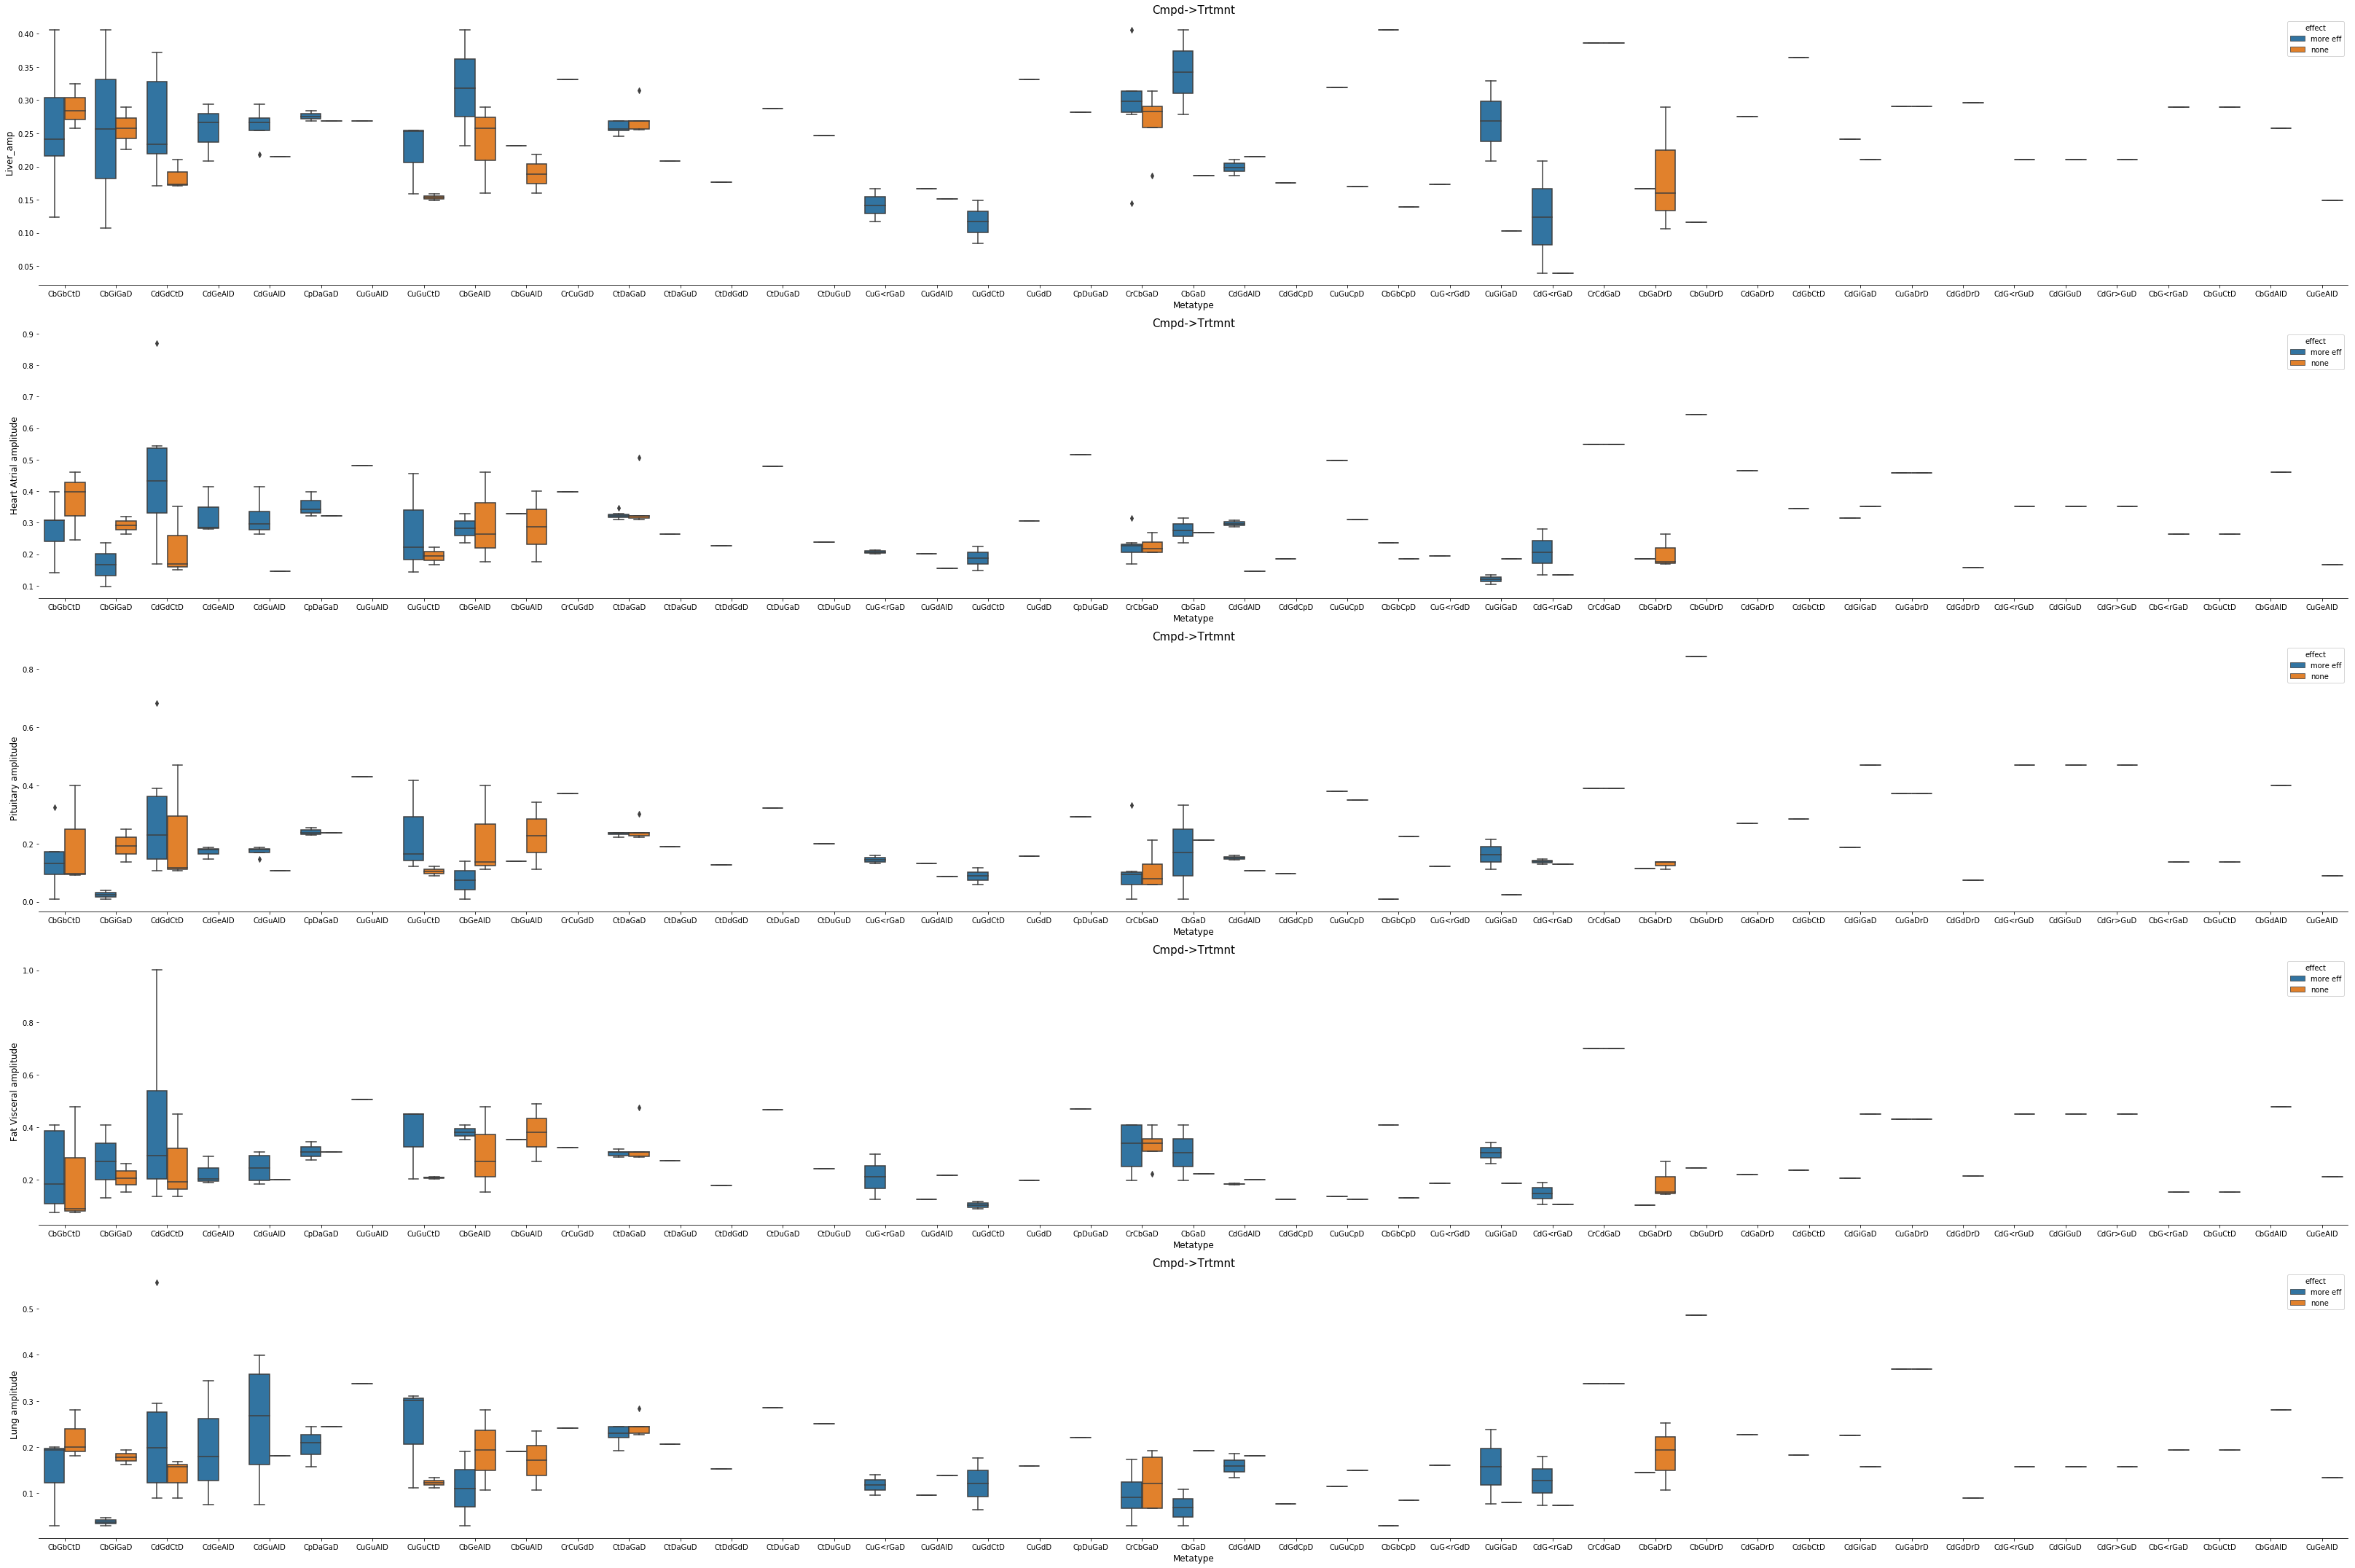

In [6]:
# summary by metatype
hetio_circa_metatype = hetio_circa.groupby(['effect','halftime','metatype','compound','treatment'], 
                                          as_index=False).mean()

# 
f, axes = plt.subplots(5, 1, figsize=(45, 30))
sns.despine(left=True)

# 
sns.boxplot(x = 'metatype', y = 'Liver_amp', hue = 'effect', data = hetio_circa_metatype, ax=axes[0])
axes[0].set_title('Cmpd->Trtmnt', size=15)
axes[0].set_xlabel('Metatype', size= 12)
axes[0].set_ylabel('Liver_amp', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Heart Atrial_amp', hue = 'effect', data = hetio_circa_metatype, ax=axes[1])
axes[1].set_title('Cmpd->Trtmnt', size=15)
axes[1].set_xlabel('Metatype', size= 12)
axes[1].set_ylabel('Heart Atrial amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Pituitary_amp', hue = 'effect', data = hetio_circa_metatype, ax=axes[2])
axes[2].set_title('Cmpd->Trtmnt', size=15)
axes[2].set_xlabel('Metatype', size= 12)
axes[2].set_ylabel('Pituitary amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Fat Visceral_amp', hue = 'effect', data = hetio_circa_metatype, ax=axes[3])
axes[3].set_title('Cmpd->Trtmnt', size=15)
axes[3].set_xlabel('Metatype', size= 12)
axes[3].set_ylabel('Fat Visceral amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Lung_amp', hue = 'effect', data = hetio_circa_metatype, ax=axes[4])
axes[4].set_title('Cmpd->Trtmnt', size=15)
axes[4].set_xlabel('Metatype', size= 12)
axes[4].set_ylabel('Lung amplitude', size= 12)
plt.tight_layout()
plt.savefig('plot/hetio_circa_metatype.pdf')

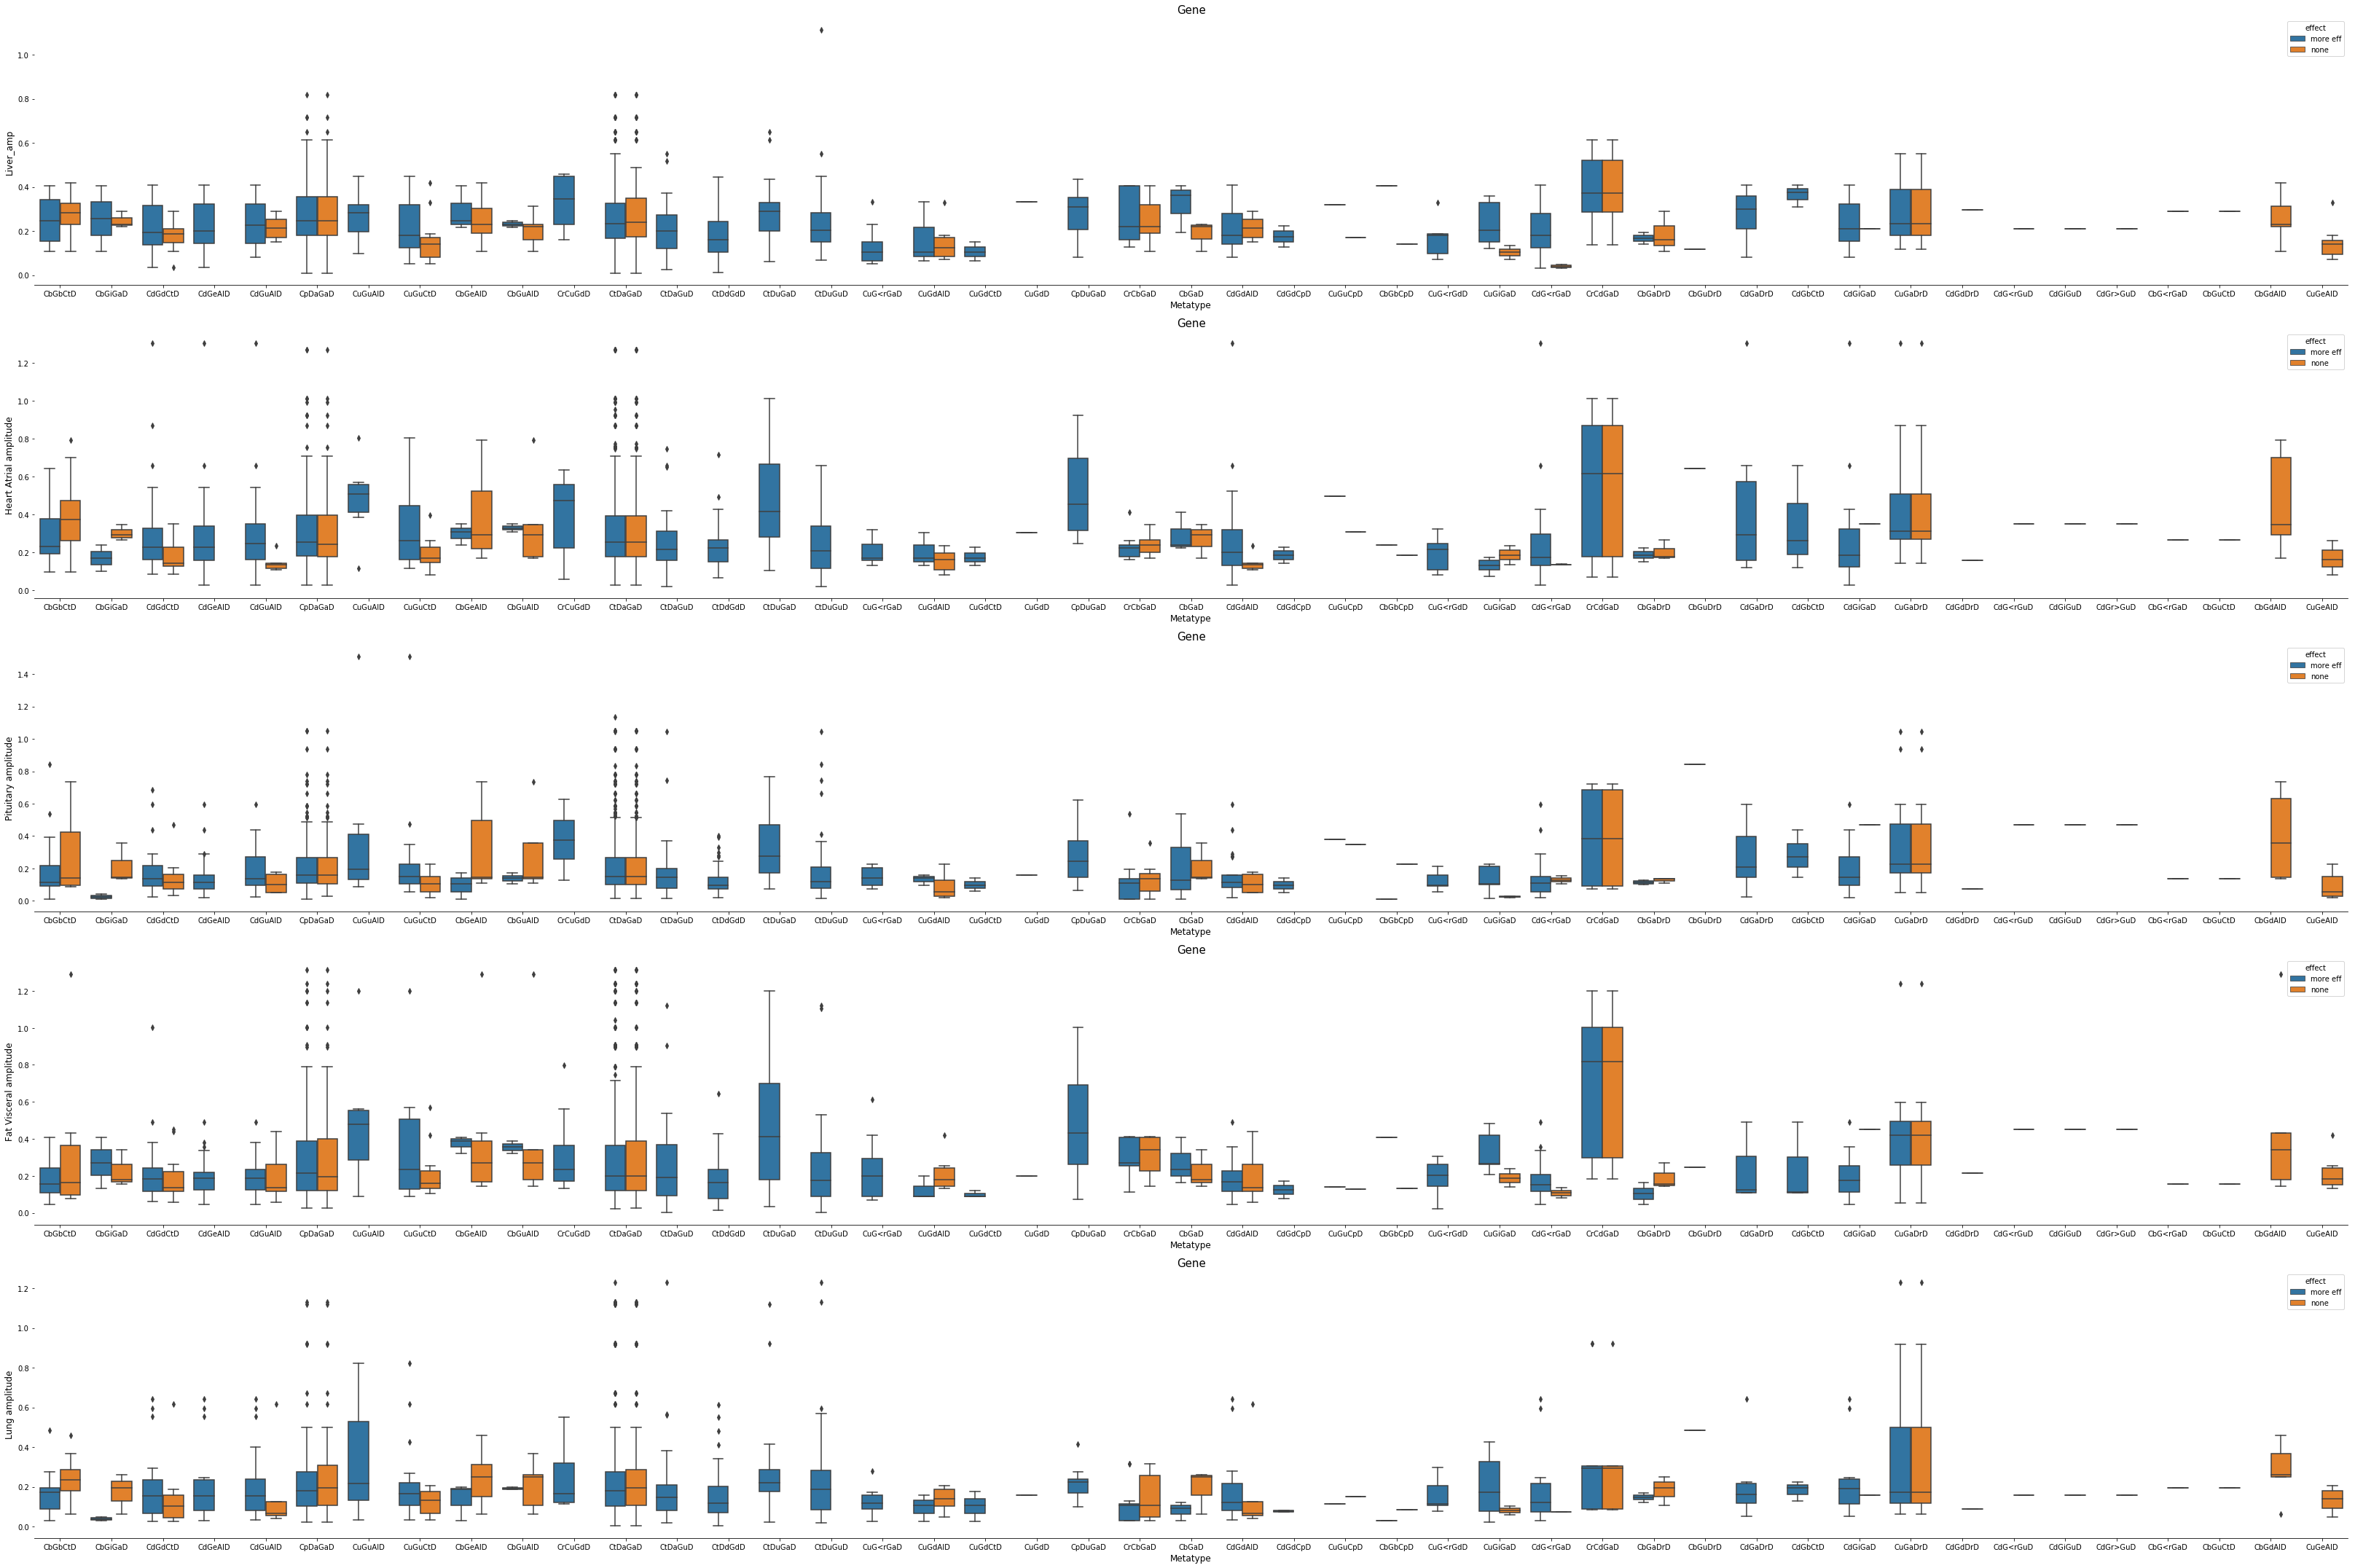

In [7]:
# summary by gene
hetio_circa_gene = hetio_circa.groupby(['effect','halftime','metatype','gene','gene_id'], 
                                          as_index=False).mean()

# 
f, axes = plt.subplots(5, 1, figsize=(45, 30))
sns.despine(left=True)

# 
sns.boxplot(x = 'metatype', y = 'Liver_amp', hue = 'effect', data = hetio_circa_gene, ax=axes[0])
axes[0].set_title('Gene', size=15)
axes[0].set_xlabel('Metatype', size= 12)
axes[0].set_ylabel('Liver_amp', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Heart Atrial_amp', hue = 'effect', data = hetio_circa_gene, ax=axes[1])
axes[1].set_title('Gene', size=15)
axes[1].set_xlabel('Metatype', size= 12)
axes[1].set_ylabel('Heart Atrial amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Pituitary_amp', hue = 'effect', data = hetio_circa_gene, ax=axes[2])
axes[2].set_title('Gene', size=15)
axes[2].set_xlabel('Metatype', size= 12)
axes[2].set_ylabel('Pituitary amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Fat Visceral_amp', hue = 'effect', data = hetio_circa_gene, ax=axes[3])
axes[3].set_title('Gene', size=15)
axes[3].set_xlabel('Metatype', size= 12)
axes[3].set_ylabel('Fat Visceral amplitude', size= 12)

# 
sns.boxplot(x = 'metatype', y = 'Lung_amp', hue = 'effect', data = hetio_circa_gene, ax=axes[4])
axes[4].set_title('Gene', size=15)
axes[4].set_xlabel('Metatype', size= 12)
axes[4].set_ylabel('Lung amplitude', size= 12)
plt.tight_layout()
plt.savefig('plot/hetio_circa_metatype_gene.pdf')